**Imports**

In [4]:
import pandas as pd
import numpy as np
import seaborn as sns
import json
import simplejson
import matplotlib.pyplot as plt
from pathlib import Path
from typing import List, Dict, Tuple
from sklearn.linear_model import LinearRegression

**Code**

Q1 = 13.0
Q3 = 19.0
IQR = 6.0
Lower Bound = 4.0
Upper Bound = 28.0

القيم الشاذة:
   income
6     100


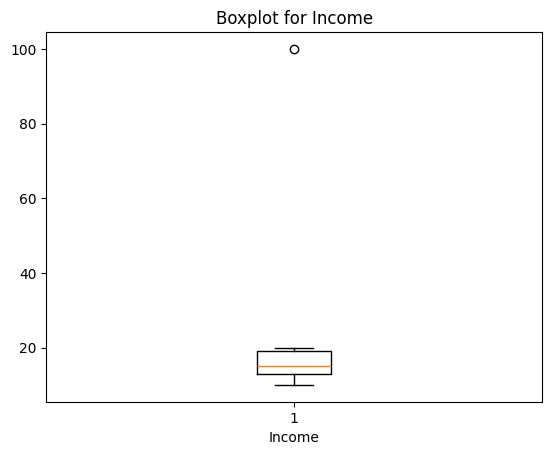

In [5]:
# =========================
# 1️⃣ استيراد المكتبات
# =========================
# import pandas as pd
# import matplotlib.pyplot as plt

# =========================
# 2️⃣ إنشاء بيانات تجريبية
# =========================
# نفترض أن هذا عمود دخل (income)
data = {
    "income": [10, 12, 14, 15, 18, 20, 100]
}

# تحويل البيانات إلى DataFrame
df = pd.DataFrame(data)

# =========================
# 3️⃣ حساب Q1 و Q3
# =========================
# Q1: الربع الأول (25%)
# Q3: الربع الثالث (75%)
Q1 = df["income"].quantile(0.25)
Q3 = df["income"].quantile(0.75)

# =========================
# 4️⃣ حساب IQR
# =========================
IQR = Q3 - Q1

# =========================
# 5️⃣ حساب الحدود (Lower & Upper)
# =========================
k = 1.5  # معامل Tukey الشائع

lower_bound =  Q1 - k * IQR
upper_bound = Q3 + k * IQR

# =========================
# 6️⃣ طباعة القيم للحساب
# =========================
print("Q1 =", Q1)
print("Q3 =", Q3)
print("IQR =", IQR)
print("Lower Bound =", lower_bound)
print("Upper Bound =", upper_bound)

# =========================
# 7️⃣ تحديد القيم الشاذة
# =========================
# True = قيمة شاذة
outliers_mask = ( df["income"] < lower_bound) | (df["income"] > upper_bound)

# عرض القيم الشاذة فقط
outliers = df[outliers_mask]
print("\nالقيم الشاذة:")
print(outliers)

# =========================
# 8️⃣ رسم Boxplot
# =========================
plt.boxplot(df["income"])
plt.title("Boxplot for Income")
plt.xlabel("Income")
plt.show()

In [6]:
# =========================
# 1️⃣ استيراد المكتبات
# =========================
# import pandas as pd

# =========================
# 2️⃣ إنشاء بيانات تجريبية
# =========================
# نفترض أن هذه بيانات دخل (income)
data = {
    "income": [10, 12, 14, 15, 18, 20, 100]
}

# تحويل البيانات إلى DataFrame
df = pd.DataFrame(data)

# =========================
# 3️⃣ تحويل العمود إلى float
# =========================
# (أحيانًا يكون العمود نصي، فنحوّله لأرقام)
income = df["income"].astype(float)

# =========================
# 4️⃣ حساب المتوسط والانحراف المعياري
# =========================
mean = income.mean()        # المتوسط الحسابي
std = income.std(ddof=0)    # الانحراف المعياري (Population)

print("Mean =", mean)
print("Std =", std)

# =========================
# 5️⃣ حساب Z-Score لكل قيمة
# =========================
# القانون: z = (x - mean) / std
df["z_score"] = (income - mean) / std

print("\nZ-scores:")
print(df)

# =========================
# 6️⃣ تحديد القيم الشاذة
# =========================
# القاعدة الشائعة: |z| > 3
mask_z = df["z_score"].abs() > 2

# =========================
# 7️⃣ عرض القيم الشاذة فقط
# =========================
outliers = df[mask_z]

print("\nZ-score outliers:")
print(outliers)

Mean = 27.0
Std = 29.966648127543394

Z-scores:
   income   z_score
0      10 -0.567297
1      12 -0.500556
2      14 -0.433816
3      15 -0.400445
4      18 -0.300334
5      20 -0.233593
6     100  2.436042

Z-score outliers:
   income   z_score
6     100  2.436042
